## Data Distribution

First of all, we import all the libraries we need and load the data and visualize it.

In [13]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We load the dataset from dataset/cyclists.csv and dataset/races.csv. The dataset contains information about the cyclists and the races.

## Distribution of the dataset

### Cyclists dataset (cyclists.csv) distribution

First of all, we analyze the cyclists dataset. The dataset contains the following columns:

In [14]:
cyclists = pd.read_csv("../dataset/cyclists.csv")
cyclists.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [15]:
cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


We start by analyzing the distribution of the dataset. We will analyze the distribution of the following columns made up of numerical values:
- $birth\_year$:    float64
- $weight$:         float64
- $height$:        float64

In [16]:
cyclists.select_dtypes(include=['number']).head()

,birth_year,weight,height
0,1964.0,NaN,NaN
1,1965.0,74.0,182.0
2,1996.0,69.0,189.0
3,1995.0,78.0,192.0
4,1997.0,55.0,171.0


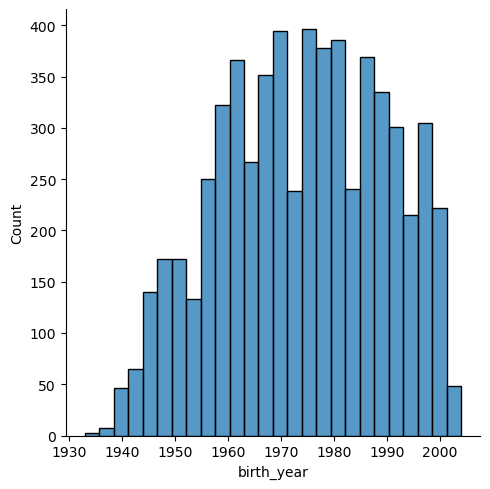

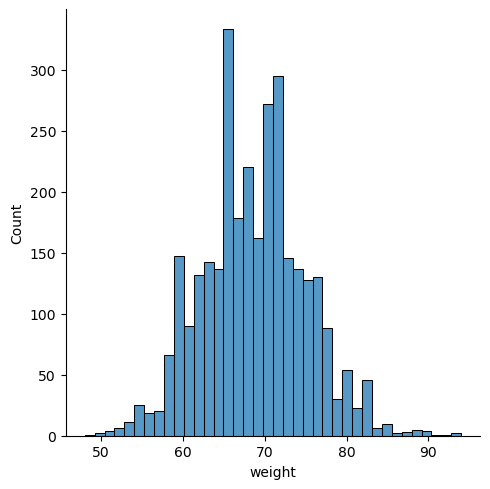

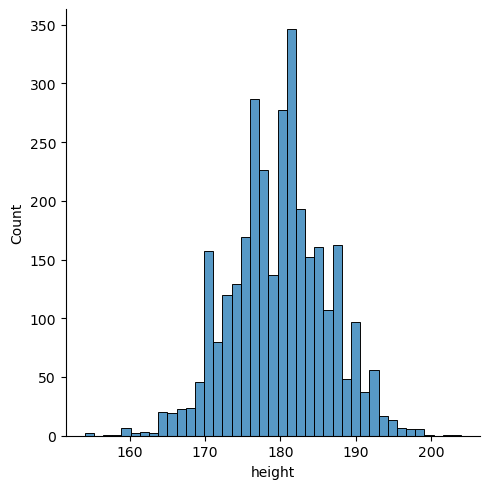

In [17]:

for feature in cyclists.select_dtypes(include="number").columns:
    seaborn.displot(cyclists,x=feature)

By looking at the distribution, we notice that distribution of the weight and height of the cyclists have a similar distribution. For a better understanding, we exploit the correlation between the weight and height of the cyclists. To do this, we use a pairplot to visualize the correlation between the weight and height of the cyclists.

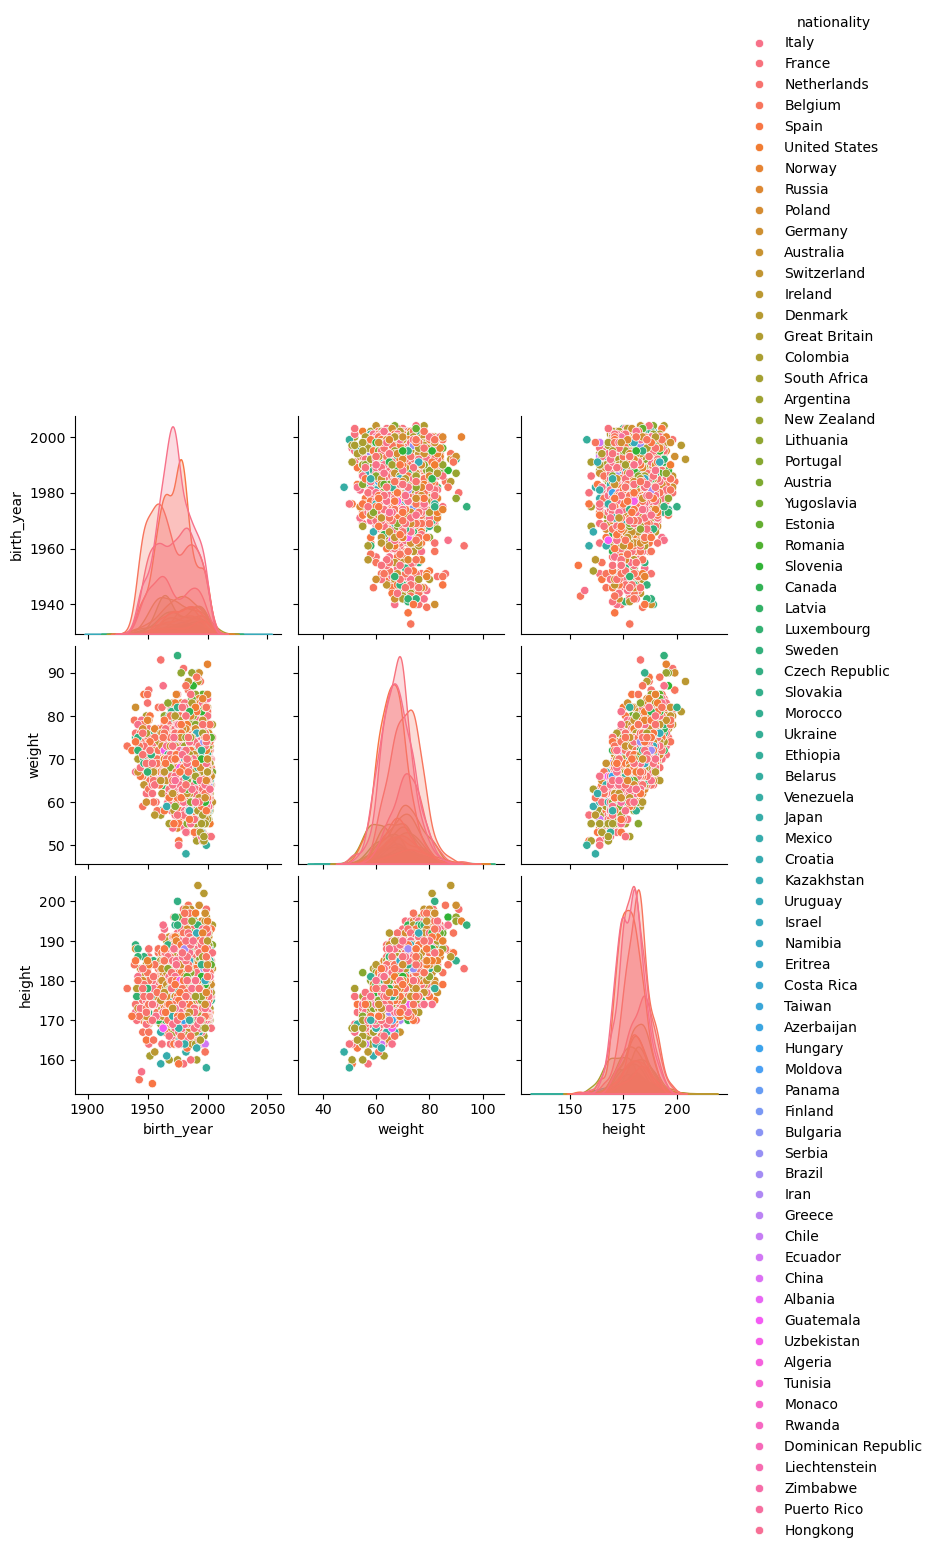

In [18]:
seaborn.pairplot(cyclists, hue="nationality", vars=["birth_year", "weight", "height"])
plt.show()

By looking at the pairplot, we notice that the $weight$ and $height$ of the cyclists have a positive correlation. This means that the $weight$ and $height$ of the cyclists are directly proportional. For a further understanding, we also look at the correlation matrix of the dataset.

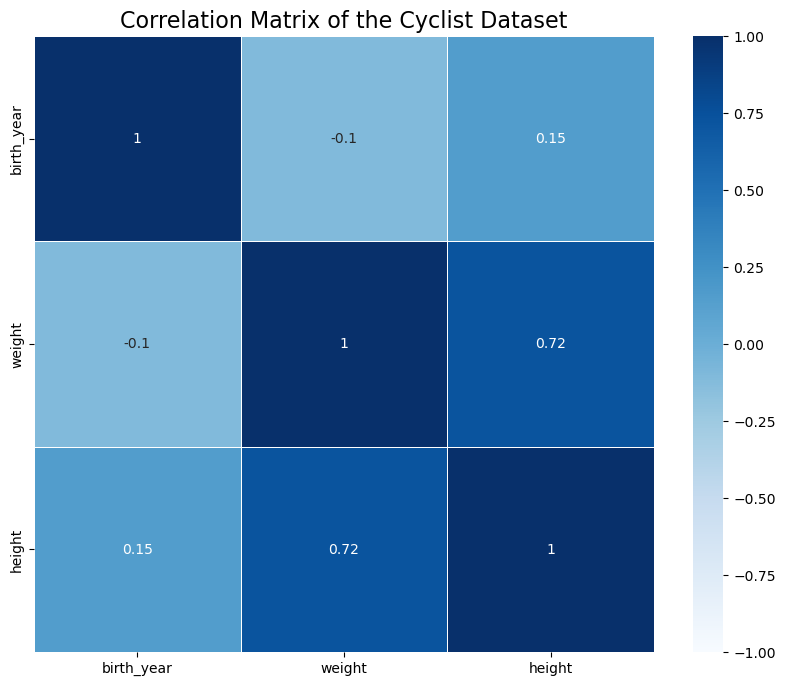

In [19]:
cyclist_correlations = cyclists[['birth_year', 'weight', 'height']].corr()

plt.figure(figsize=(10, 8)) 
seaborn.heatmap(cyclist_correlations, annot=True, cmap='Blues', vmin=-1, vmax=1, linewidths=0.5)


plt.title("Correlation Matrix of the Cyclist Dataset", fontsize=16)


plt.show()


By looking at the correlation matrix, we notice that the correlation between the $weight$ and $height$ of the cyclists is 0.72. This means that the weight and height of the cyclists are strongly correlated. 

Now we will analyze the distribution of the cycylists over the different countries. We will analyze the distribution of the following columns made up of categorical values:
- $nationality$:   object

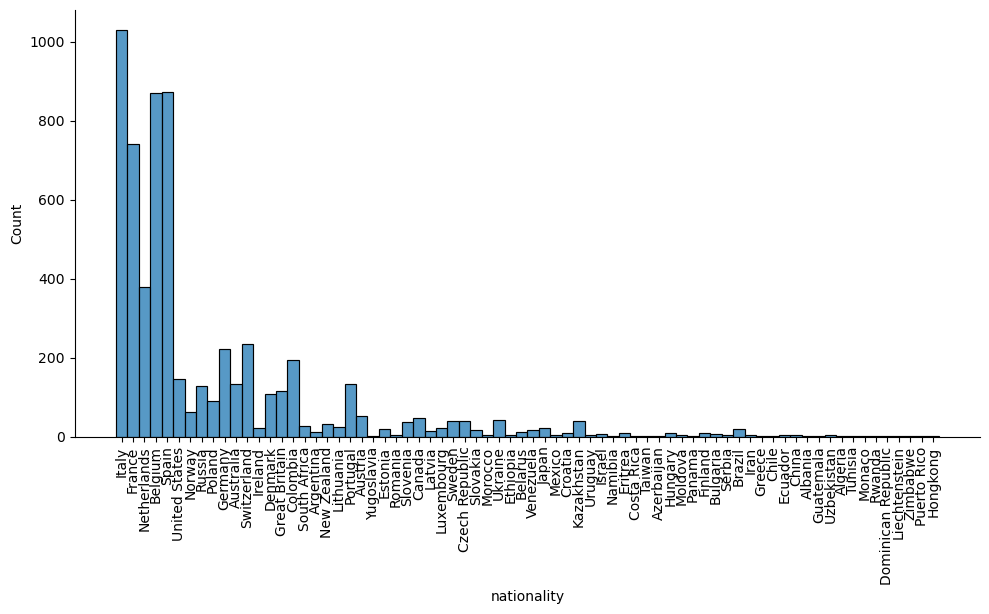

In [20]:
g = seaborn.displot(cyclists, x = "nationality",
                    kind="hist",
                    row_order="desc",
                    bins=cyclists["nationality"].unique().size,
                    aspect=2,
                    )
g.set_xticklabels(rotation=90)

Now we analyze the distribution of the cyclists with a boxplot. We will analyze the distribution of the following columns made up of numerical values:
- $wight$:    float64
- $height$:   float64

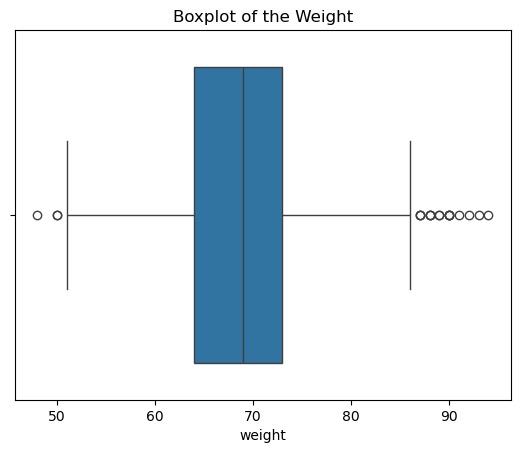

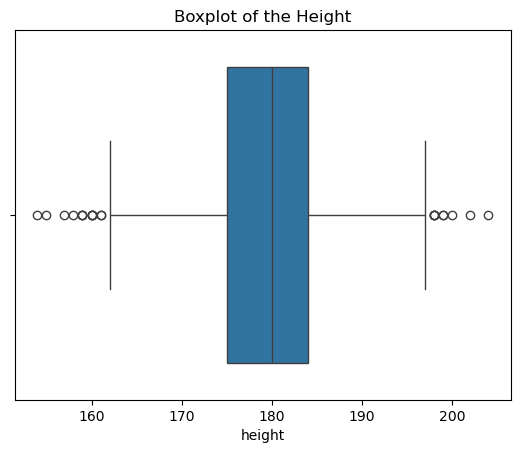

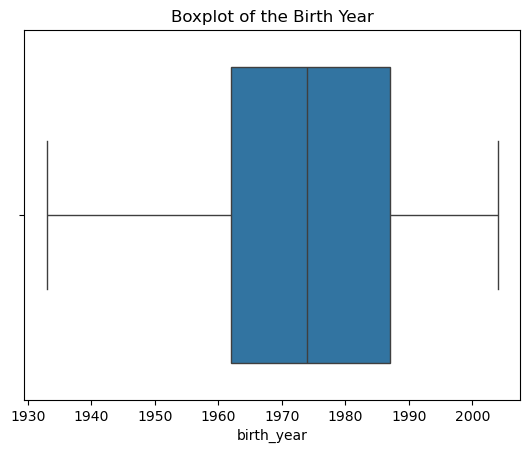

In [21]:
import seaborn
import matplotlib.pyplot as plt

seaborn.boxplot(x="weight", data=cyclists)
plt.title("Boxplot of the Weight")
plt.show()


seaborn.boxplot(x="height", data=cyclists)
plt.title("Boxplot of the Height")
plt.show()

seaborn.boxplot(x="birth_year", data=cyclists)
plt.title("Boxplot of the Birth Year")
plt.show()


As we can see there are some outliers in the $weight$ and $height$ of the cyclists' distributions. We will remove the outliers from the dataset and analyze the distribution of the cyclists again.

### Races dataset (races.csv) distribution

Now we analyze the races dataset's distributions. The dataset is made up by the following columns:

In [22]:
races = pd.read_csv("../dataset/races.csv")
races.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


In [23]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

Now we plot the distributions of the attributes that include numerical values to analyze their distributions.
- $points$:                        float64
- $uci\_points$:                    float64
- $length$:                        float64
- $climb\_total$:                   float64
- $profile$:                       float64
- $startlist\_quality$:               int64

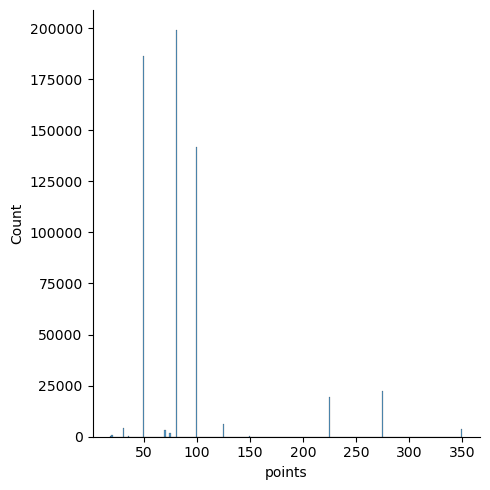

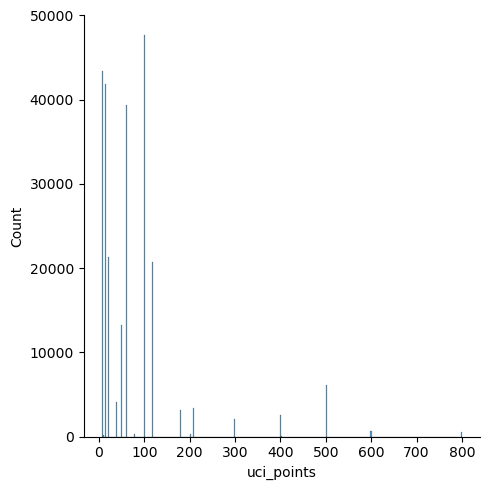

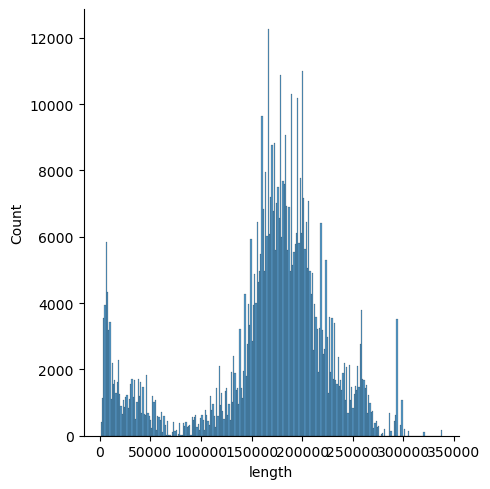

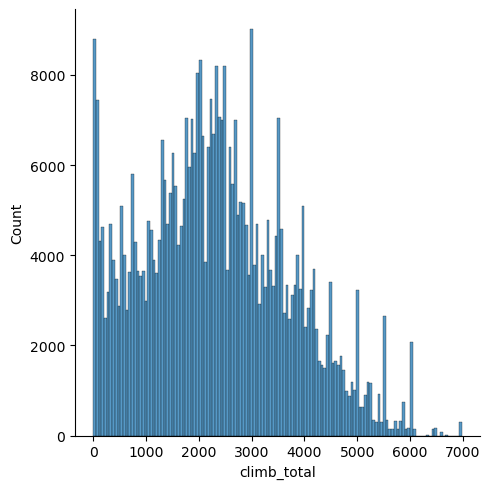

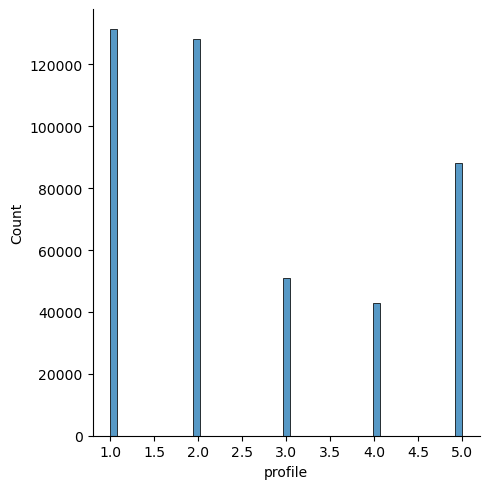

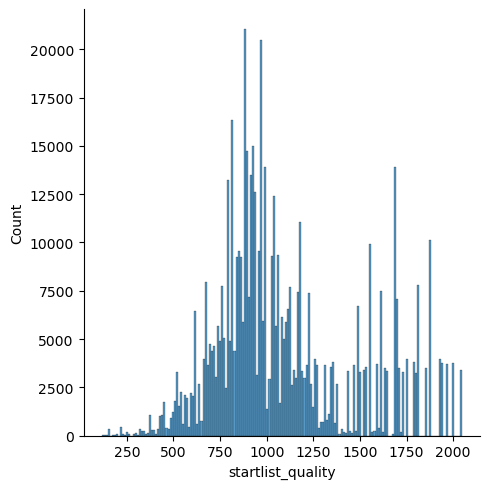

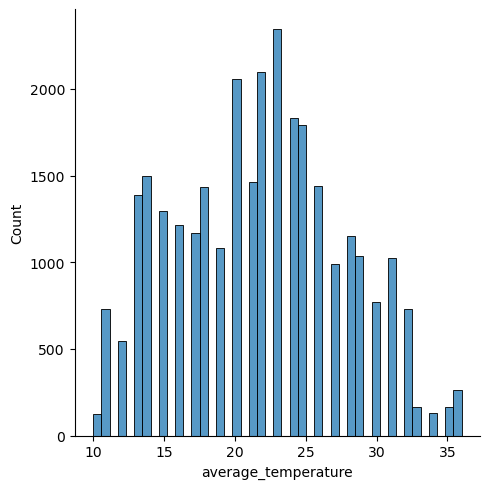

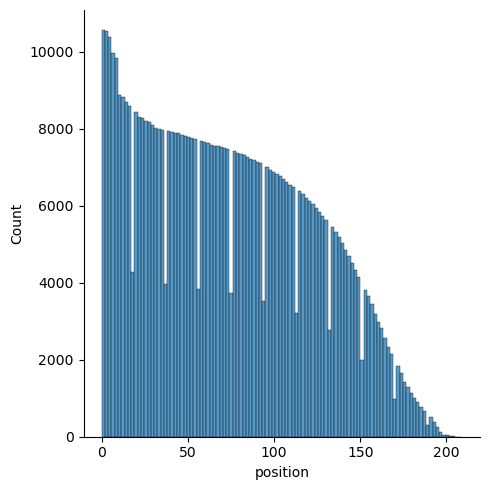

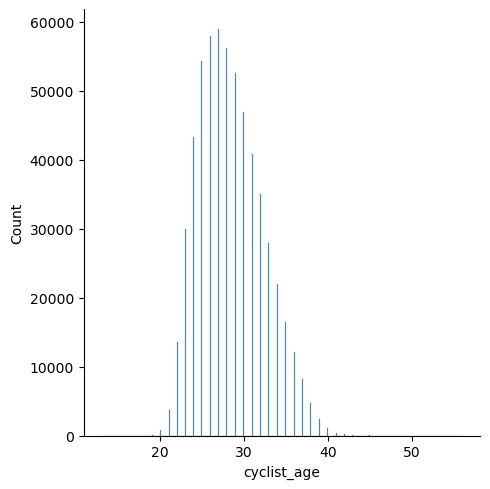

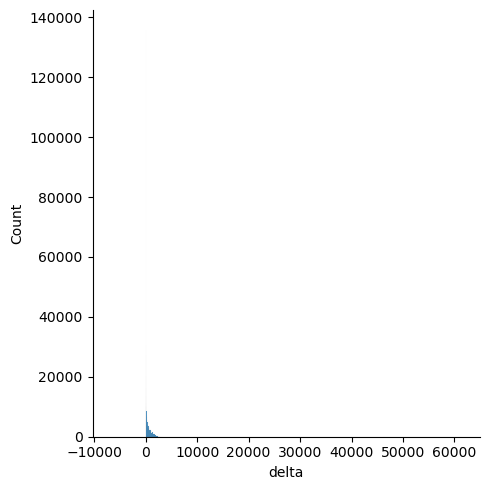

In [24]:
for feature in races.select_dtypes(include="number").columns:
    seaborn.displot(races,x=feature)

We noticed that $climb\_total$, $profile$ and $uci\_points$ have some missing values. We will fill the missing values with the mean of the column. We will analyze the distribution again after filling the missing values.

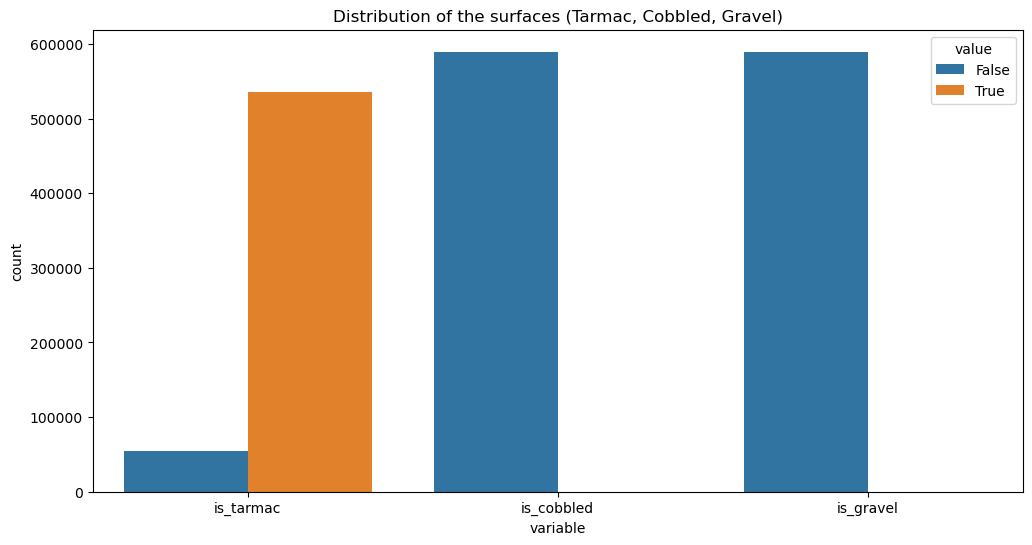

In [25]:
plt.figure(figsize=(12, 6))
seaborn.countplot(data=races.melt(value_vars=['is_tarmac', 'is_cobbled', 'is_gravel']), 
              x='variable', hue='value')
plt.title('Distribution of the surfaces (Tarmac, Cobbled, Gravel)')
plt.show()

As we can see the most common surface type is tarmac, while the other two types (cobbled and gravel) are always set false in the entire dataset.

Here we visualize the distribution of the cyclists over the different comptitions.

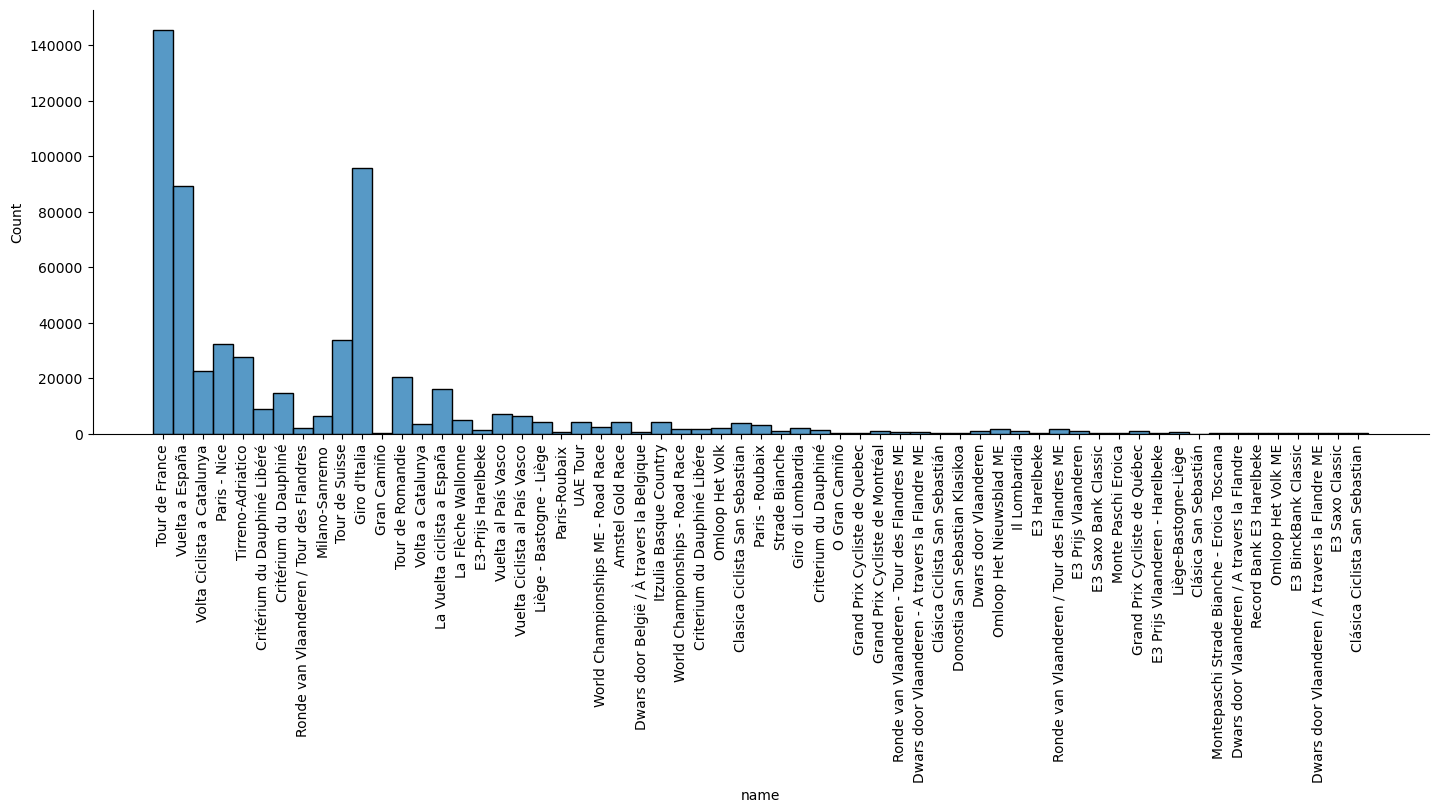

In [26]:
g = seaborn.displot(races, x = "name",
                    kind="hist",
                    row_order="desc",
                    bins=races["name"].unique().size,
                    aspect=3,
                    )
g.set_xticklabels(rotation=90)

Here we analyze the distribution of the cyclists over the differnet teams

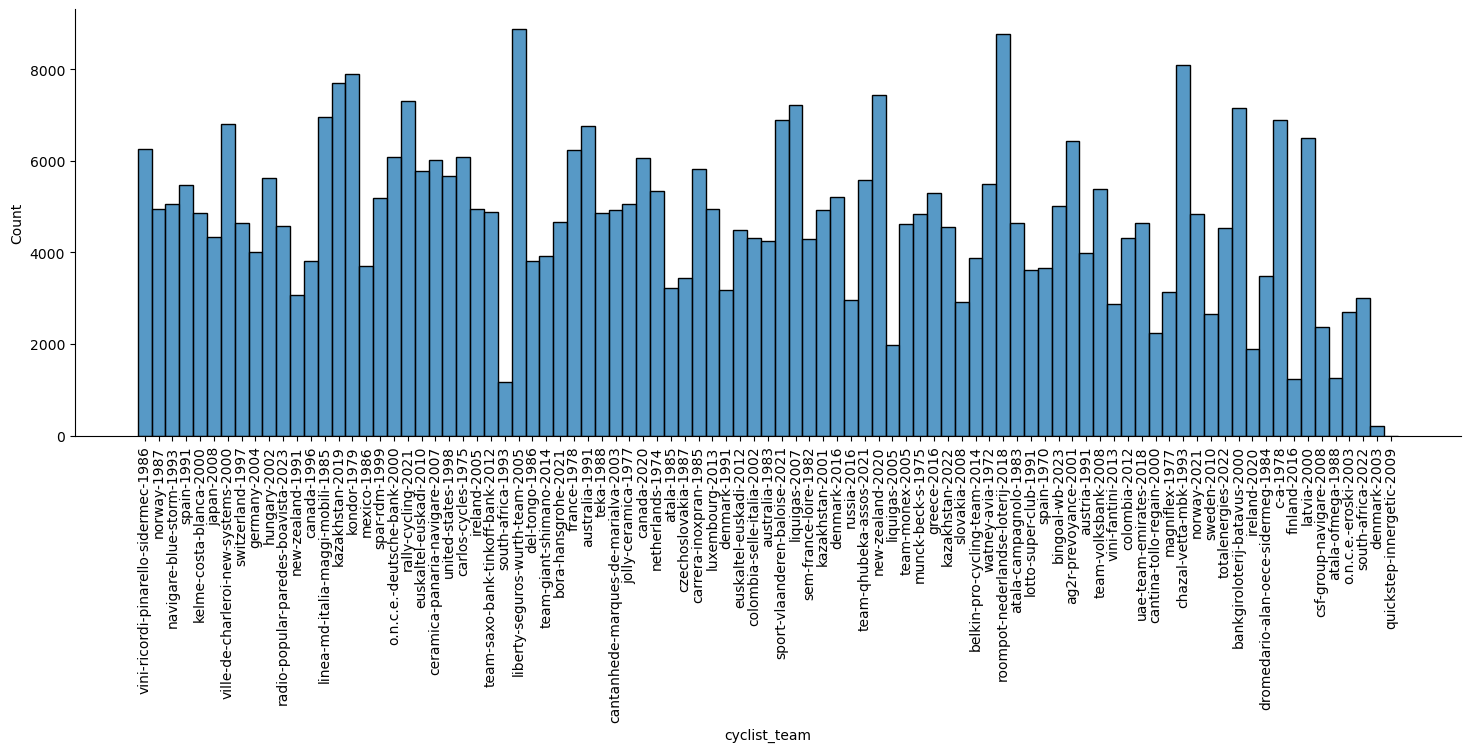

In [27]:
g = seaborn.displot(races, x = "cyclist_team",
                    kind="hist",
                    row_order="desc",
                    bins=races["cyclist_team"].unique().size,
                    aspect=3,
                    )
g.set_xticklabels(rotation=90)

Here we plot the distribution of the partecipants over the years.

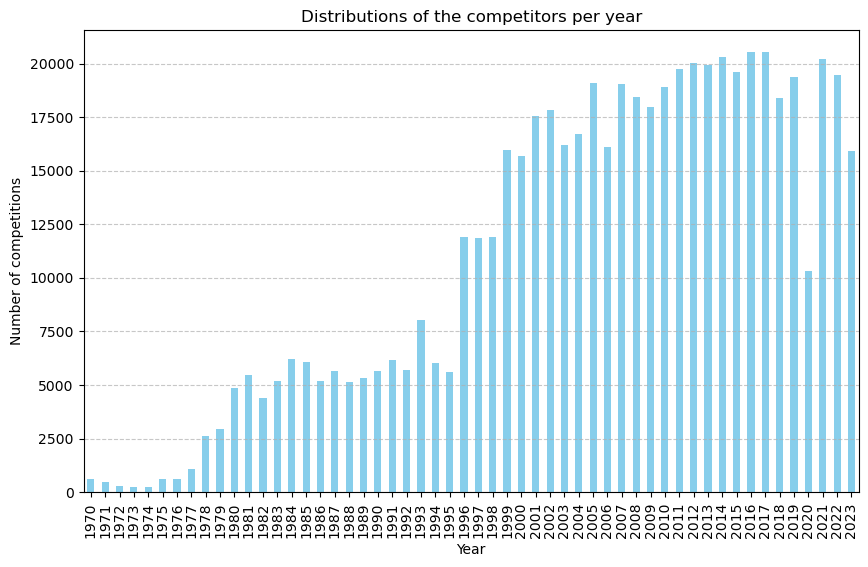

In [28]:
races['date'] = pd.to_datetime(races['date'])
races['year'] = races['date'].dt.year

races_per_year = races['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
races_per_year.plot(kind='bar', color='skyblue')

plt.title('Distributions of the competitors per year')
plt.xlabel('Year')
plt.ylabel('Number of competitions')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Now we plot the distributions of the numerical values to see if there are outliers.

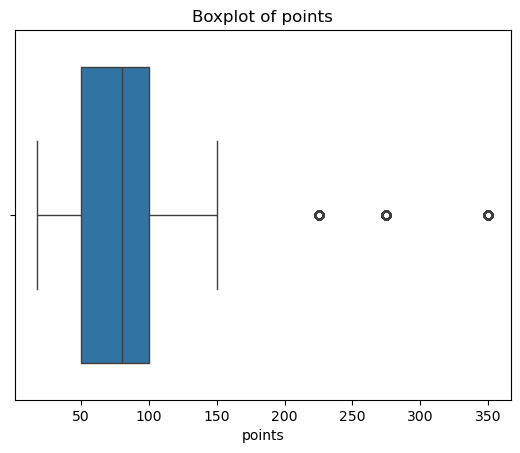

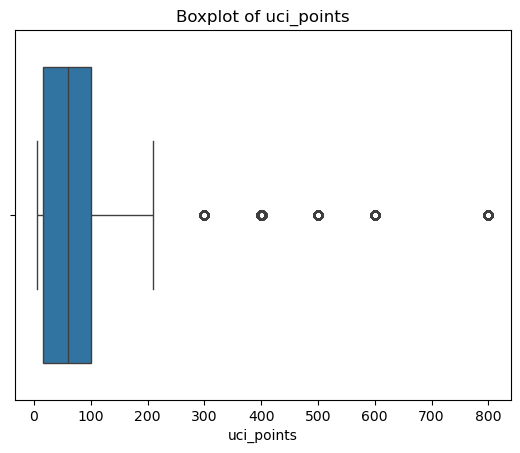

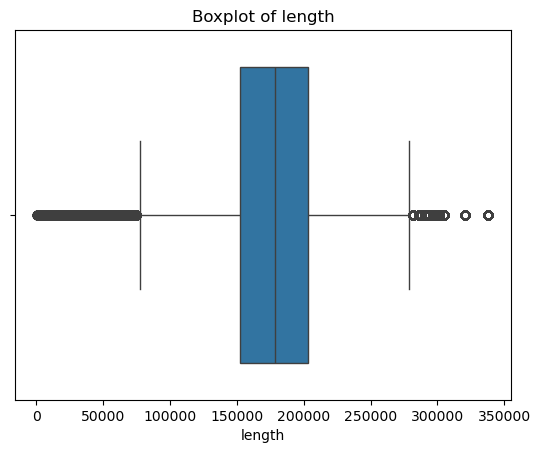

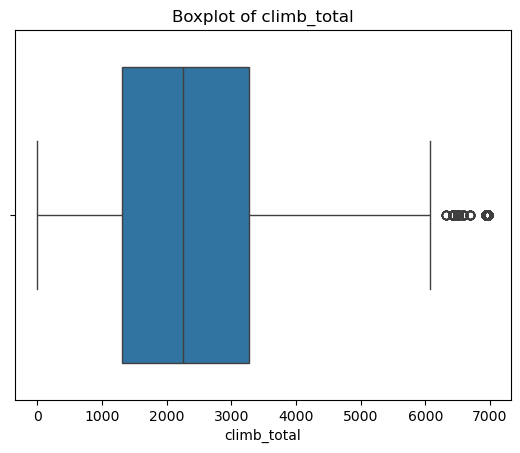

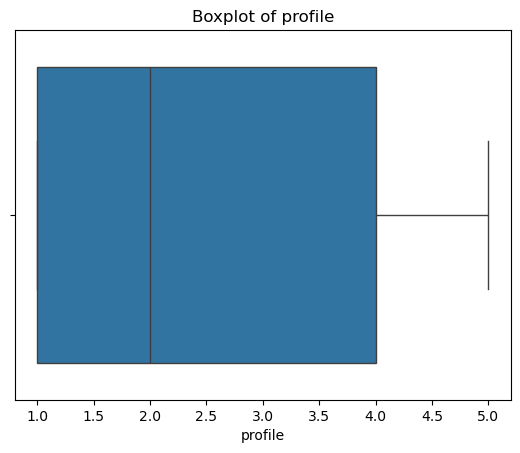

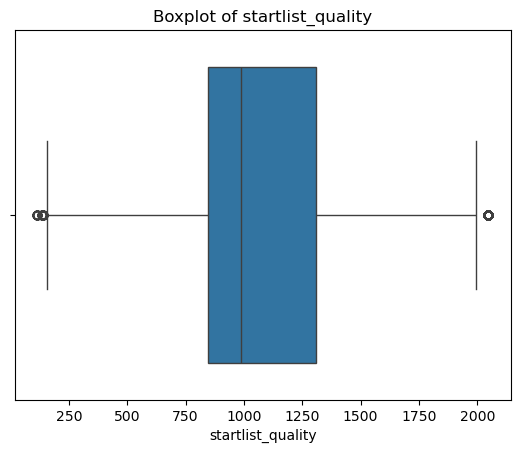

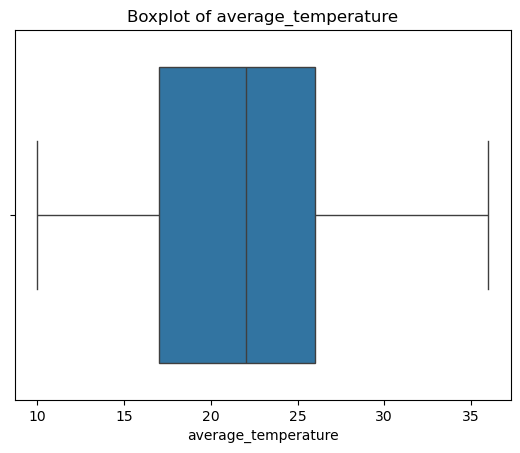

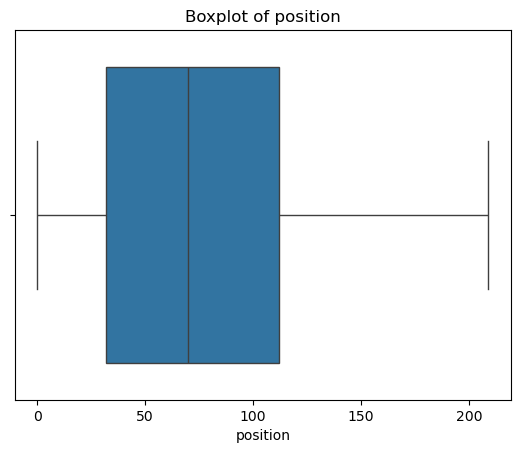

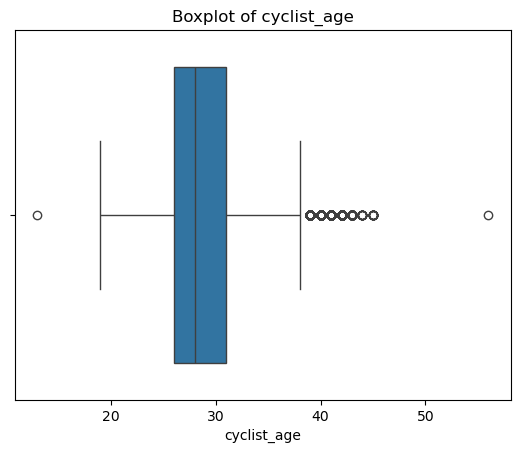

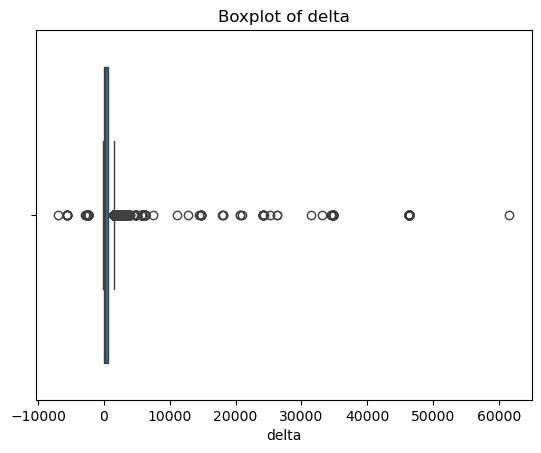

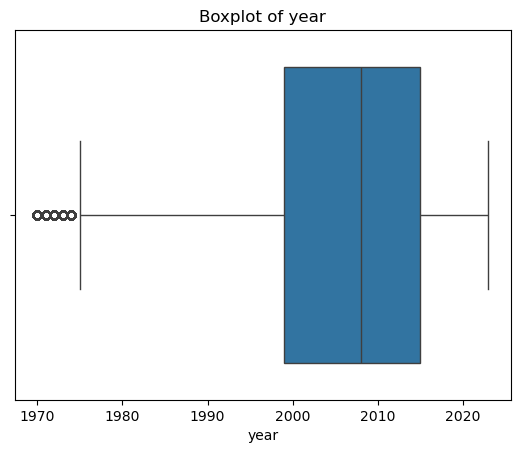

In [29]:
for feature in races.select_dtypes(include="number").columns:
    seaborn.boxplot(races,x=feature)
    plt.title("Boxplot of "+feature)
    plt.show()

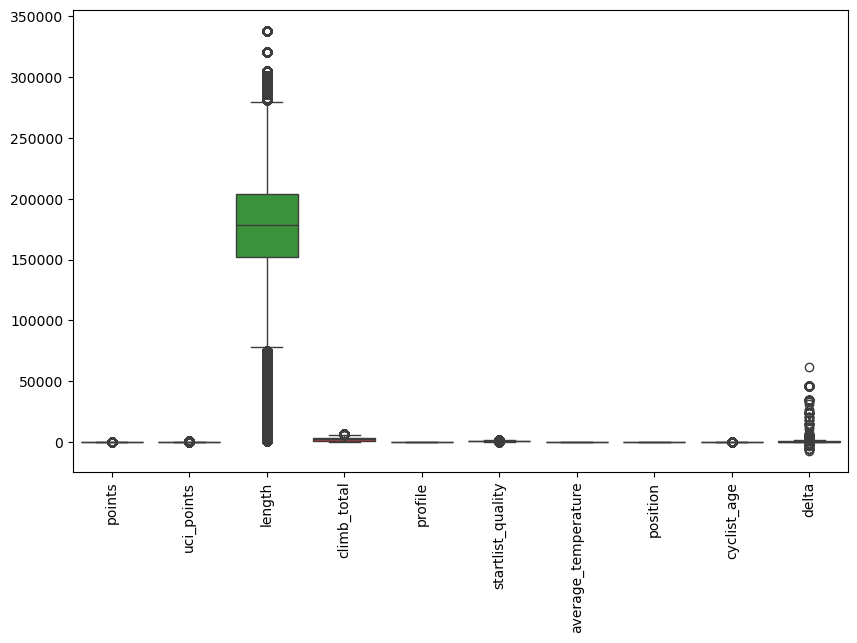

In [30]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=races.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

As we can see the following attributes present some outliers:
- $points$
- $uci\_points$
- $length$
- $climb\_total$
- $startlist\_quality$
- $cyclist\_age$
- $delta$

We will remove the outliers from the dataset and analyze the distribution of the races again.

Now we analyze the correlation between the numerical values.

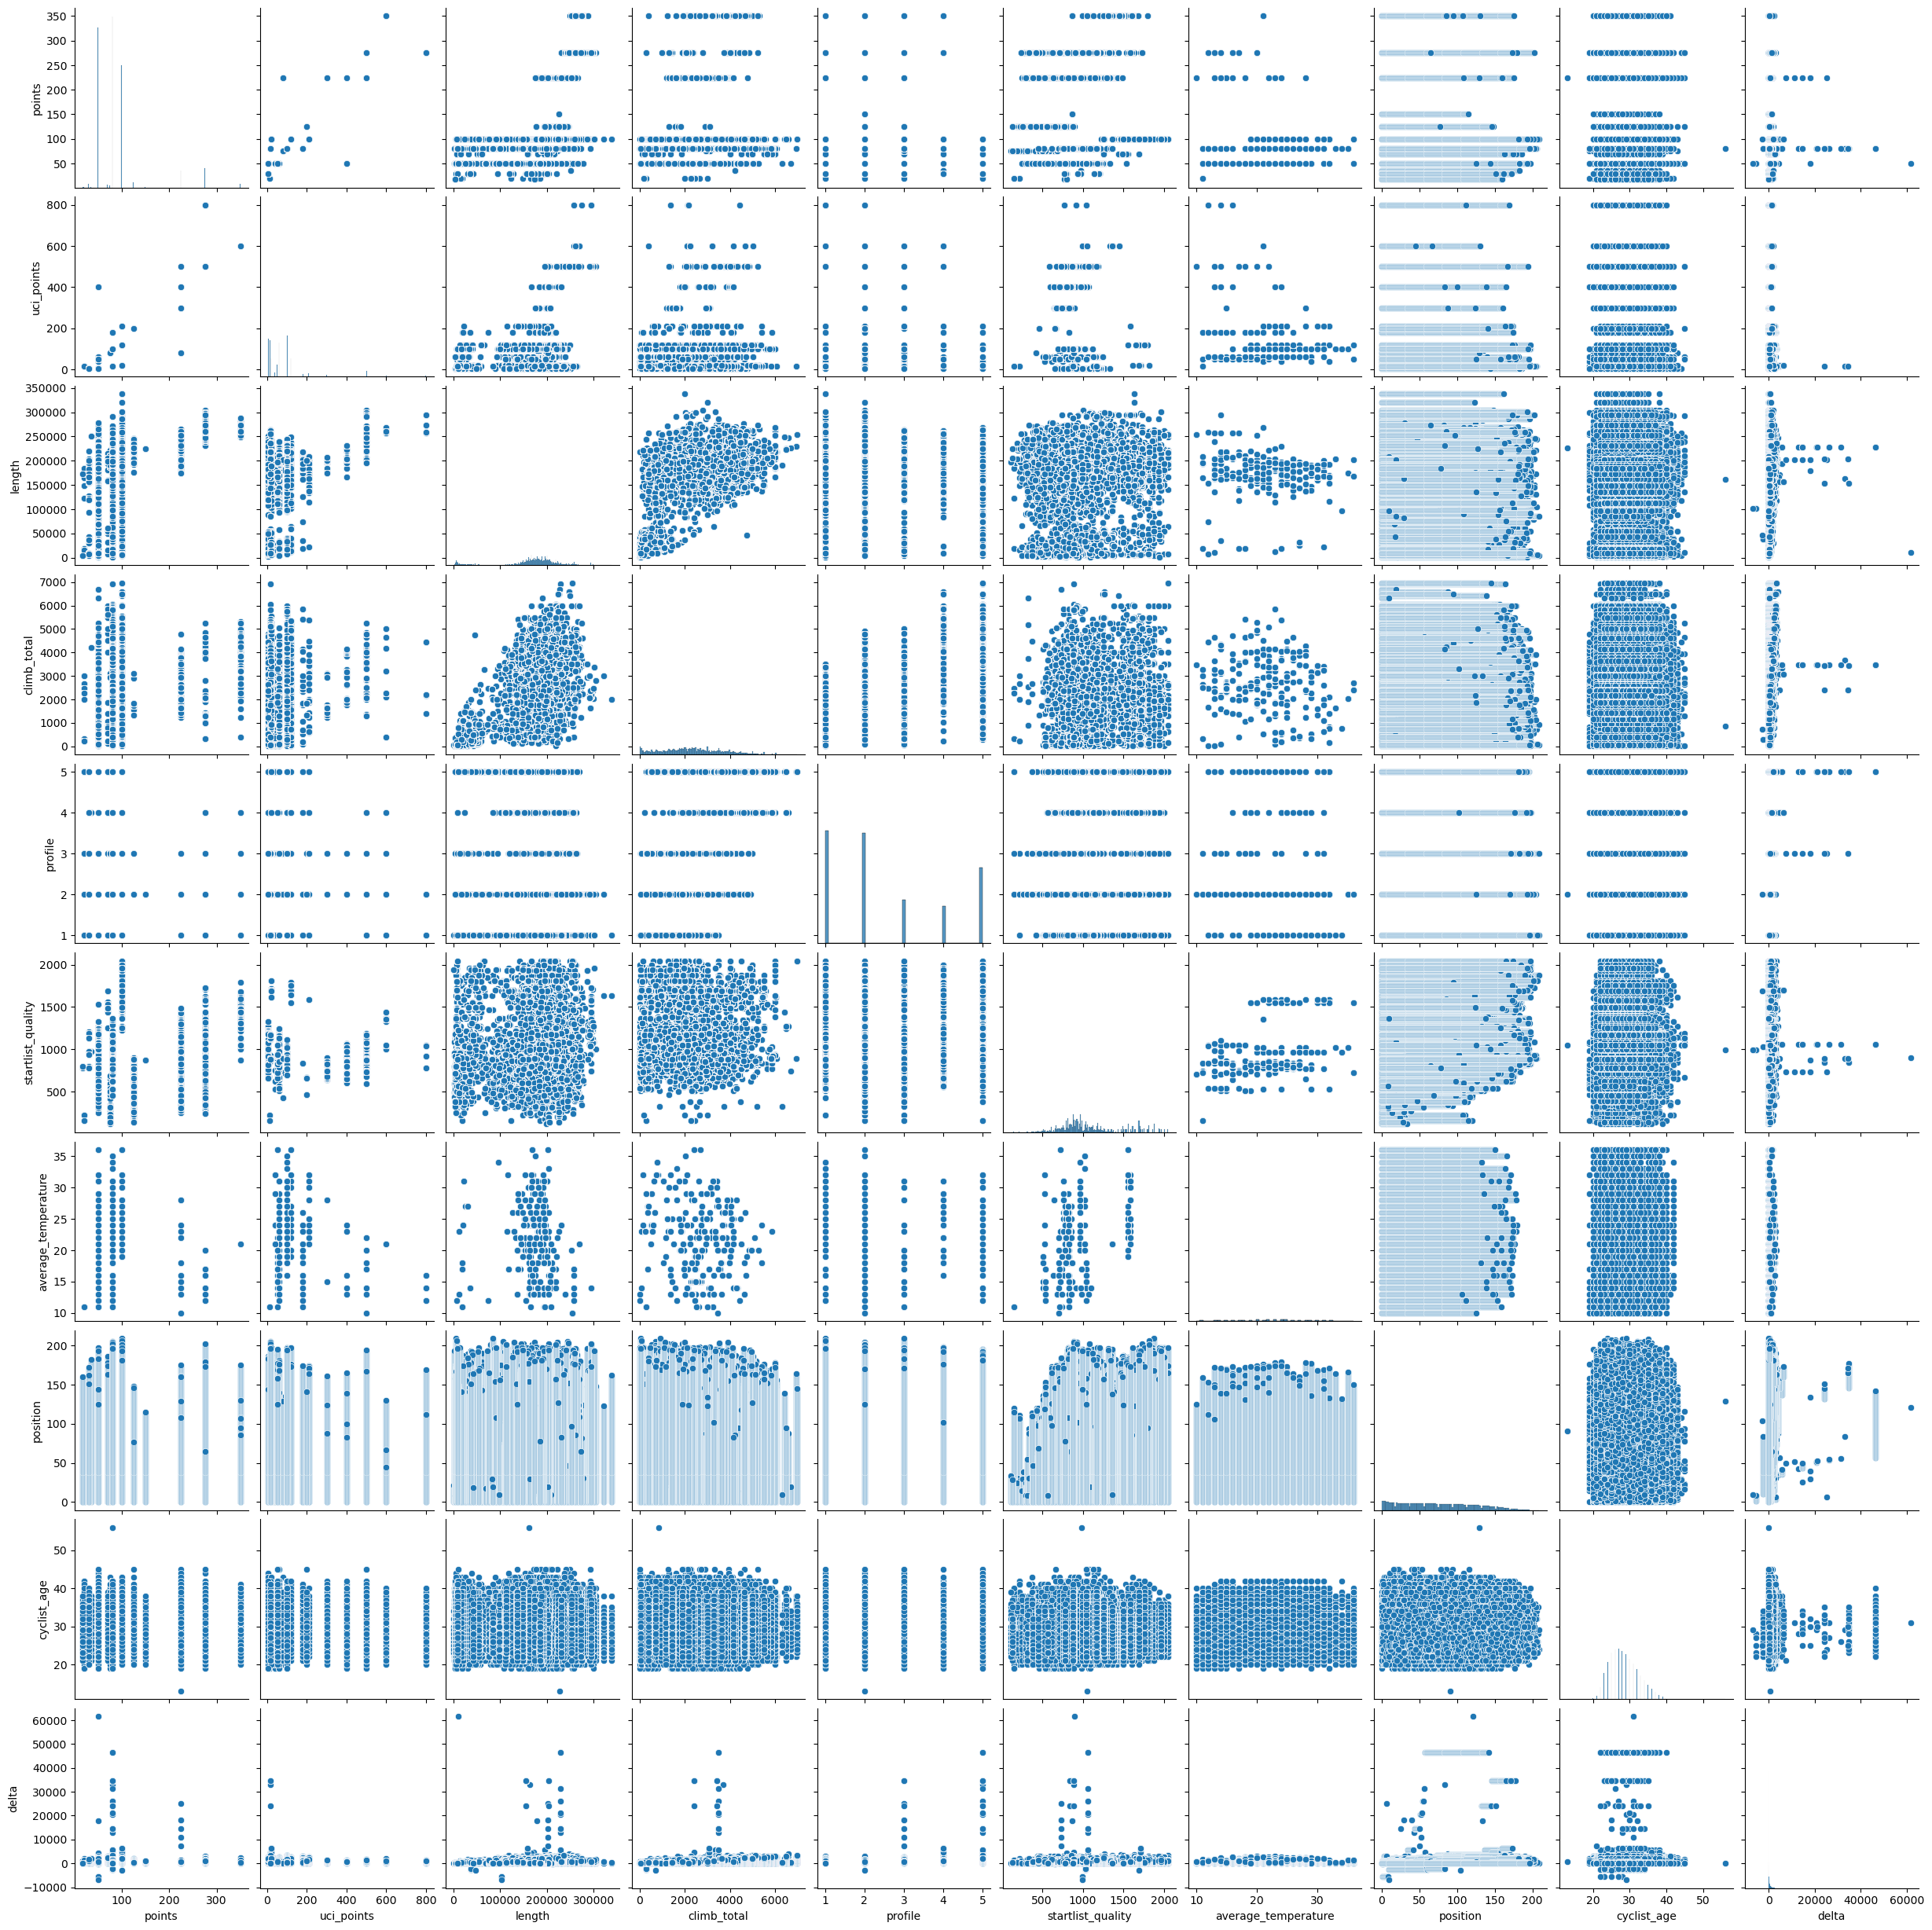

In [31]:
seaborn.pairplot(races, vars=races.select_dtypes(include=['float64', 'int64']))
plt.show()

Now we analyze the correlation matrix to find the correlation between the attributes.

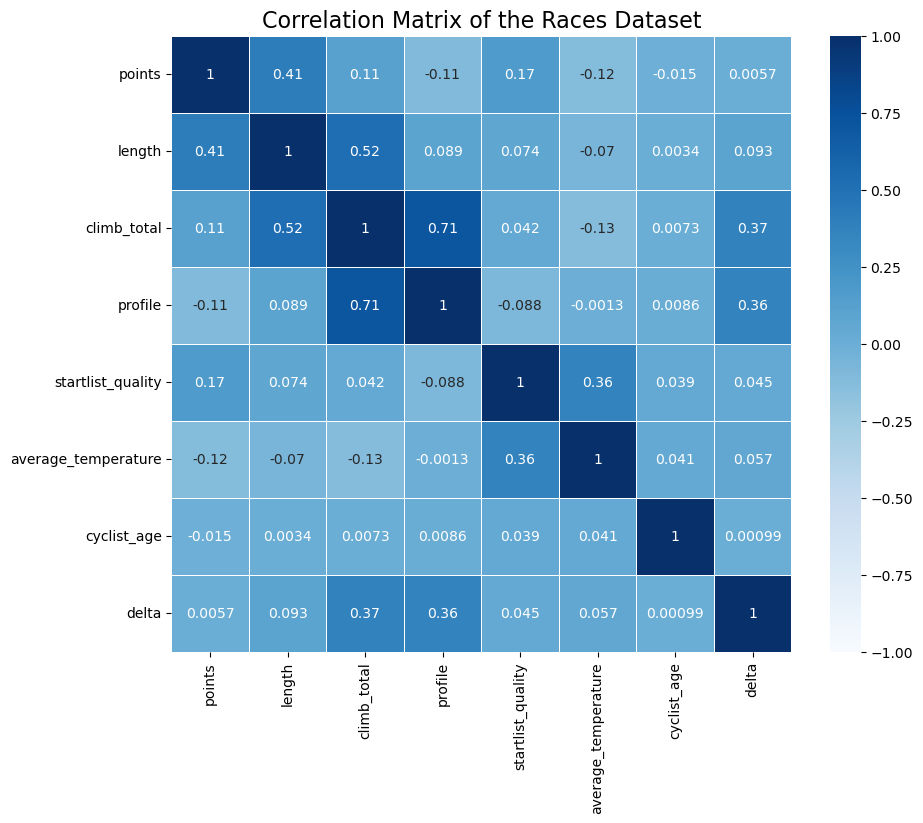

In [32]:
races_correlations = races[["points", "length", "climb_total", "profile", "startlist_quality", "average_temperature", "cyclist_age", "delta"]].corr()

plt.figure(figsize=(10, 8))
seaborn.heatmap(races_correlations, annot=True, cmap='Blues', vmin=-1, vmax=1, linewidths=0.5)

plt.title("Correlation Matrix of the Races Dataset", fontsize=16)

plt.show()

As we can see $profile$ and $climb\_total$ have a strong correlation. This means that the profile and the total climb grow together.